# 1. Downloading and looking into the data

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from numpy.linalg import inv

## Data description

#### Features: insured person's gender, age, salary, and number of family members.

#### Target: number of insurance benefits received by the insured person over the last five years.

In [2]:
# gold_recovery_train
df = pd.read_csv('/datasets/insurance_us.csv')
display(df.head())
df.info()
df.describe()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Gender                5000 non-null int64
Age                   5000 non-null float64
Salary                5000 non-null float64
Family members        5000 non-null int64
Insurance benefits    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Gender,Age,Salary,Family members,Insurance benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [3]:
def print_graphs(df):
    df = df
    temp_raw_data=df.copy()
    fig = plt.figure(figsize = (10,10))
    ax = fig.gca()
    temp_raw_data.hist(ax = ax)
    fig = ax.get_figure()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


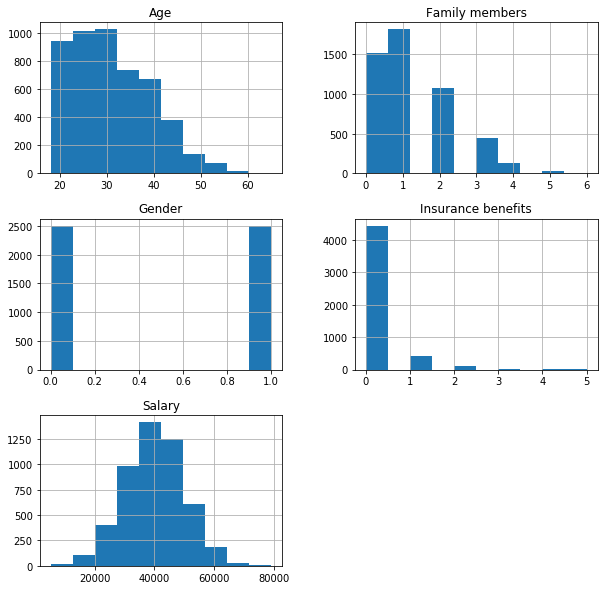

In [4]:
print_graphs(df)

# 2. Providing a theoretical proof based on the equation of linear regression

The features are multiplied by an invertible matrix. Show that the quality of the model is the same for both sets of parameters: the original features and the features after multiplication. How are the weight vectors from MSE minimums for these models related?

$X$ - original matrix
$A$ - invertible matrix
$I$ - idintity matrix
$H$ - original predictions
$w$ - original weights
$v$ - new weights
_______________________

We will multiply the feature vector by an invertible matrix A.
$$H = Xw$$
$$v = Aw$$
$$w_{min} = arg min MSE(Xw, y)$$
$$v_{min} = arg min MSE(Xv, y) = arg min MSE(XAw, y)$$


$$w = (X^TX)^{-1}X^Ty$$
$$v = A((XA)^T(XA))^{-1}(XA)^Ty$$
$$v = A(A^T(X^TX)A)^{-1}(XA)^Ty$$
$$v = AA^{-1}(X^TX)^{-1}(A^T)^{-1}(XA)^Ty$$
$$v = IX^{-1}(X^T)^{-1}(A^T)^{-1}A^TX^Ty$$
$$v = X^{-1}(X^T)^{-1}IX^Ty$$
$$v = (X^TX)^{-1}X^Ty$$
- - -

_______________________

We proved that v = w after multiplying w by a scalar.

# 3. Stating an algorithm for data transformation to solve the task

From the above proof, we see that the quality would not change. We have 4 features and one target, thus, we will choose an invertible matrix of 4x4.

In [5]:
A = np.random.rand(4,4)
print('A:')
print(A)

print('Inverse A:')
print(inv(A))

A:
[[0.88068707 0.67775801 0.52488209 0.8049473 ]
 [0.09288701 0.55419798 0.61608984 0.34327544]
 [0.6053695  0.86276668 0.29423893 0.15570161]
 [0.62334634 0.97634703 0.84366124 0.44312448]]
Inverse A:
[[ 0.14503581 -3.8308352  -1.18426649  3.12029178]
 [-0.11165852  2.83877845  2.79293024 -2.97764513]
 [-0.90720008 -2.13045608 -2.74151764  4.26164726]
 [ 1.76920821  3.19027151  0.73173842 -3.68563274]]


In [6]:
features = df.drop(['Insurance benefits'], axis=1)
multiplied_features = features.dot(A)
multiplied_df = multiplied_features
multiplied_df['Insurance benefits'] = df['Insurance benefits']
multiplied_df.columns = df.columns


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


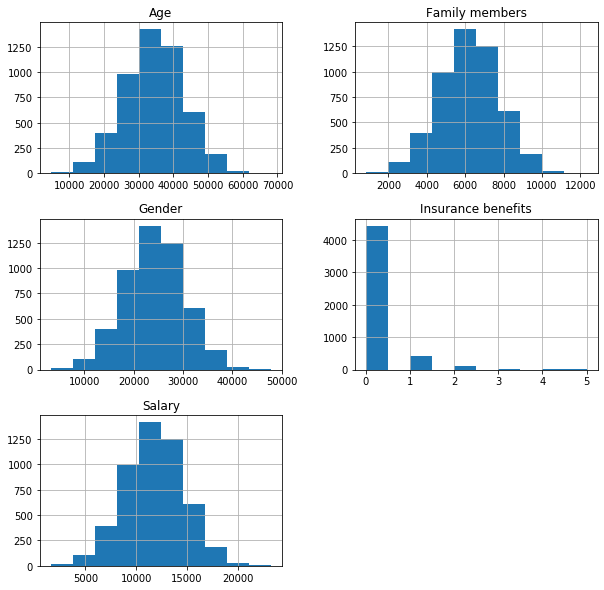

In [7]:

print_graphs(multiplied_df)

We can see that the only feature changed is the Gender one, where the parameter got normalized.

# 4. Programming your algorithm using matrix operations

We make sure that the quality of linear regression from sklearn is the same before and after transformation using the R2 metric.

In [8]:
target_name = 'Insurance benefits'

def run_linear_regression(df):
    df = df
    features_train, features_test, target_train, target_test = train_test_split(df.drop([target_name], axis=1), df[target_name], test_size=0.25, random_state=12345)
    model = LinearRegression()
    model.fit(features_train,target_train)
    predicted_test = model.predict(features_test)
    return (r2_score(target_test,predicted_test))
    

In [9]:
original_r2 = run_linear_regression(df)
print("The value of R2 for the original dataframe is: ", original_r2)

The value of R2 for the original dataframe is:  0.435227571270266


In [10]:
multiplied_r2 = run_linear_regression(multiplied_df)
print("The value of R2 for the multiplied dataframe is: ", multiplied_r2)

The value of R2 for the multiplied dataframe is:  0.4352275712697381


## Conclusion:

As we prooved before, the weights had not change, and also R2 score is the same after we multiplied the features matrix.

### Draft

w_min = arg min MSE(Xw, y)

#### multiplying w by a scalar
We will use this:
AA^(-1) = A^(-1)A = E
AE = EA = A

w = (X'X)^(-1)X'y
v = Aw

v_min = arg min MSE(Xv, y)
v_min = arg min MSE(XAw, y)

v_min = (X'X)^(-1)X'y
v_min = ?? (X'X)^(-1)X'y ?? = w_min

We will multiply the feature vector by an invertible matrix A.

v_min = A*((XA)'*(XA))^(-1)*(XA)'y = A*(A'X'XA)^(-1)*(XA)'y

= A*(XA)^(-1)*(XA)'^(-1)*(XA)'y

= A*(A'^(-1))*X^(-1)*(X'^(-1))*(A'^(-1))*A'*X'y

= X^(-1)*(X'^(-1))*(A'^(-1))*A'*X'y = X^(-1)*(X'^(-1))'*X'y

= (X'X)^(-1)X'y = w_min